In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_path = '/content/drive/MyDrive/Data Science/Project 4/Project 4 Team 3/data/'
df = pd.read_csv(data_path + 'data_label_encoded.csv')

In [3]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance,Description,...,Start_Time_Year,Start_Time_Month,Start_Time_Day,Start_Time_Hour,Start_Time_Minute,End_Time_Year,End_Time_Month,End_Time_Day,End_Time_Hour,End_Time_Minute
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.09286,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,2016,2,8,0,37,2016,2,8,6,37
1,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172394,-84.49279,39.170475,-84.501800,0.500,At Mitchell Ave/Exit 6 - Accident.,...,2016,2,8,7,53,2016,2,8,13,53
2,A-432,2,2016-02-24 10:20:40,2016-02-24 16:20:40,41.475800,-81.66036,41.483380,-81.662810,0.539,At I-490/Exit 161 - Accident.,...,2016,2,24,10,20,2016,2,24,16,20
3,A-435,2,2016-02-24 10:49:54,2016-02-24 16:49:54,41.964290,-83.35018,41.964290,-83.350180,0.000,At Nadeau Rd/Exit 18 - Accident.,...,2016,2,24,10,49,2016,2,24,16,49
4,A-436,2,2016-02-24 11:14:18,2016-02-24 17:14:18,41.282993,-83.63893,41.283092,-83.638885,0.007,At Cygnet Rd/Exit 171 - Accident.,...,2016,2,24,11,14,2016,2,24,17,14


#imports

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

#Dropping unneeded columns and making severity dfs

In [5]:
cols_to_drop = ['ID', 'Description', 'Country', 'Weather_Timestamp', 'Start_Time', 'End_Time', 'Duration', 
                'City', 'County', 'Airport_Code', 'Street', 'Weather_Condition', 'Zipcode', 'Duration_Minutes']
df.drop(cols_to_drop, axis=1, inplace=True)
df_sev1 = df[df['Severity'] == 1]
df_sev2 = df[df['Severity'] == 2]
df_sev3 = df[df['Severity'] == 3]
df_sev4 = df[df['Severity'] == 4]

#Subsetting each severity df to smaller # of rows

In [6]:
df_sev1 = df_sev1.sample(frac=1).reset_index(drop=True)
df_sev2 = df_sev2.sample(frac=1).reset_index(drop=True)
df_sev3 = df_sev3.sample(frac=1).reset_index(drop=True)
df_sev4 = df_sev4.sample(frac=1).reset_index(drop=True)

In [7]:
length_list = [len(df_sev1), len(df_sev2), len(df_sev3), len(df_sev4)]
print(length_list)
shortest_len = min(length_list)

[23556, 2057075, 64588, 62106]


In [8]:
df_sev1 = df_sev1.head(shortest_len)
df_sev2 = df_sev2.head(shortest_len)
df_sev3 = df_sev3.head(shortest_len)
df_sev4 = df_sev4.head(shortest_len)

#train test split

In [9]:
X_sev1 = df_sev1.drop(['Severity'], axis=1)
y_sev1 = df_sev1['Severity']
X_sev2 = df_sev2.drop(['Severity'], axis=1)
y_sev2 = df_sev2['Severity']
X_sev3 = df_sev3.drop(['Severity'], axis=1)
y_sev3 = df_sev3['Severity']
X_sev4 = df_sev4.drop(['Severity'], axis=1)
y_sev4 = df_sev4['Severity']

In [10]:
#split these dfs 70/30, then combine to get 50-50 balanced training and testing sets
X_train_sev1, X_test_sev1, y_train_sev1, y_test_sev1 = train_test_split(X_sev1, y_sev1, train_size = 0.7)
num_rows_to_use = len(X_train_sev1)
X_train_sev2, X_test_sev2, y_train_sev2, y_test_sev2 = train_test_split(X_sev2, y_sev2, train_size = num_rows_to_use)
X_train_sev3, X_test_sev3, y_train_sev3, y_test_sev3 = train_test_split(X_sev3, y_sev3, train_size = num_rows_to_use)
X_train_sev4, X_test_sev4, y_train_sev4, y_test_sev4 = train_test_split(X_sev4, y_sev4, train_size = num_rows_to_use)

X_train = pd.concat([X_train_sev1, X_train_sev2, X_train_sev3, X_train_sev4])
y_train = pd.concat([y_train_sev1, y_train_sev2, y_train_sev3, y_train_sev4])
X_test = pd.concat([X_test_sev1, X_test_sev2, X_test_sev3, X_test_sev4])
y_test = pd.concat([y_test_sev1, y_test_sev2, y_test_sev3, y_test_sev4])

#one decision tree

In [ ]:
dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
dtc.fit(X_train, y_train)
preds = dtc.predict(X_test)
#something wrong with making train and test dfs
#train_df = pd.merge(X_train, y_train, left_index=True, right_index=True)
#test_df = pd.merge(X_test, y_test, left_index=True, right_index=True)
#test_df['Severity_Preds'] = preds
ConfusionMatrixDisplay.from_predictions(y_test, preds, normalize='true')
plt.show()

#Gradient Boosting

0.9039550021225414


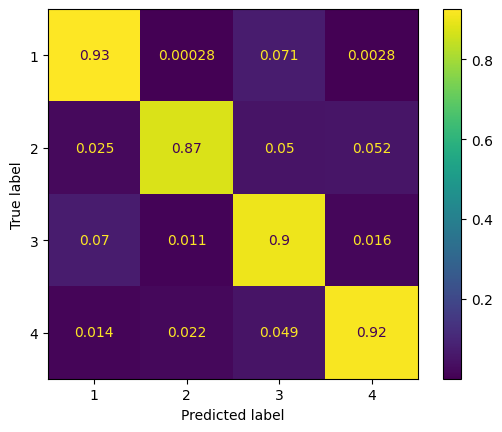

In [12]:
#starting with one learning rate
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 200, learning_rate= .05, max_depth = 10)
gbc.fit(X_train, y_train)
gbc_preds = gbc.predict(X_test)
print(accuracy_score(y_test, gbc_preds))
ConfusionMatrixDisplay.from_predictions(y_test, gbc_preds, normalize='true')
plt.show()